# PythonLab

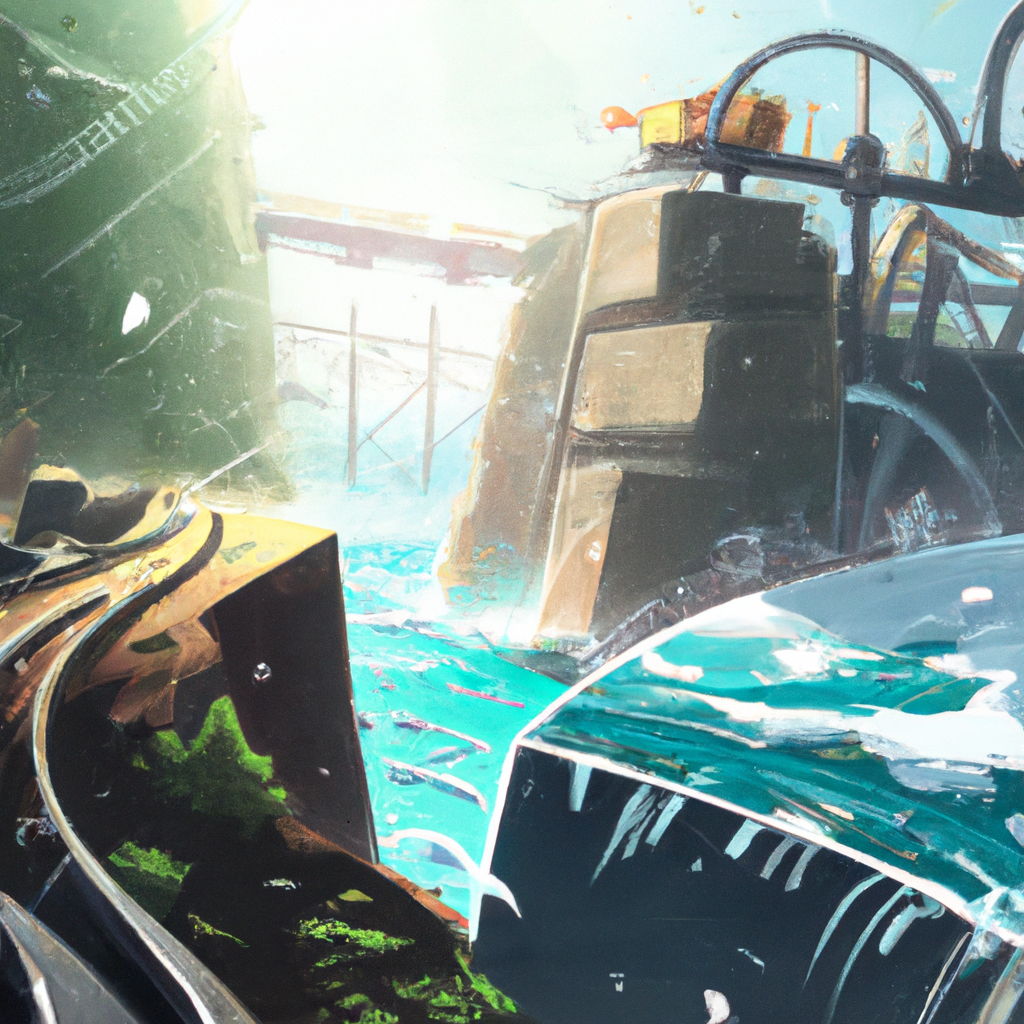

## Support Vector Machines

Overview of SVMs and their applications:

- SVMs are powerful machine learning models used for classification and regression tasks.
- They are effective in handling both linearly and non-linearly separable data.
- SVMs have been successfully applied in various domains, such as image classification, text categorization, and bioinformatics.

Intuition behind SVMs: maximizing the margin:

- The primary objective of SVMs is to find a hyperplane that separates the data points of different classes with the maximum margin.
- The margin is the distance between the hyperplane and the closest data points from each class.
- SVMs aim to find the hyperplane that maximizes this margin, leading to better generalization and robustness.

Advantages of SVMs:

- Effective in high-dimensional spaces: SVMs can handle data with a large number of features.
- Robust against overfitting: SVMs use regularization techniques to prevent overfitting.
- Versatility: SVMs can use different kernel functions to handle non-linearly separable data.
- Well-established theory: SVMs are rooted in solid mathematical foundations and have been extensively studied.

Disadvantages of SVMs:

- Computationally intensive: Training SVMs can be time-consuming, especially with large datasets.
- Sensitivity to parameter tuning: The choice of kernel function and hyperparameters can significantly impact the model's performance.
- Lack of probabilistic interpretation: SVMs do not provide explicit probability estimates for class membership.

In SVMs, a kernel function is employed to transform the data into a higher-dimensional feature space. A linear kernel, also known as the dot product kernel, performs a linear transformation by calculating the dot product between two feature vectors. This transformation allows the SVM to find a hyperplane that best separates the classes.

The linear kernel is defined by the equation:

`K(x, y) = x · y`

where x and y are the feature vectors.

The primary advantage of linear kernels is their simplicity and efficiency. Since they only involve dot products, the computation is fast and less computationally intensive compared to other kernel functions.

Linear kernels are effective when the classes are linearly separable, meaning they can be distinctly separated by a straight line or hyperplane. However, they may not be suitable for datasets with complex nonlinear relationships.

In summary, linear kernels provide a straightforward and efficient way to perform classification using SVMs. They are ideal for datasets with linear separability, allowing for effective separation of classes using a linear decision boundary.

Number of columns: 30
Accuracy: 0.9035087719298246


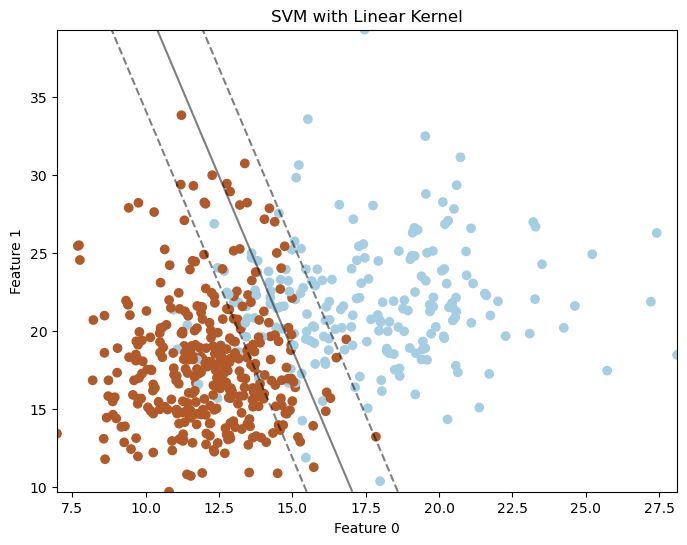

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, model_selection

# Load the breast cancer dataset
breast_cancer = datasets.load_breast_cancer()

# Access the data and target attributes
data = breast_cancer.data
target = breast_cancer.target

# Check the shape of the data (number of rows, number of columns)
num_rows, num_columns = data.shape

print("Number of columns:", num_columns)

# Use only the first two features for visualization
X = breast_cancer.data[:, :2]
y = breast_cancer.target

# Create an SVM model with linear kernel
svm_model = svm.SVC(kernel='linear')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
y_min = np.min(X[:, 1])
y_max = np.max(X[:, 1])
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)
XX, YY = np.meshgrid(xx, yy)
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.figure(figsize=(8, 6))
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVM with Linear Kernel')
plt.show()

Polynomial kernels allow SVMs to handle non-linear relationships by transforming the data into a higher-dimensional feature space.

The polynomial kernel is defined by the equation:

`K(x, y) = (x · y + c)^d`

where x and y are the feature vectors, c is a constant term, and d is the degree of the polynomial.

The degree parameter controls the complexity of the decision boundary. Higher degrees allow for more complex and flexible boundaries, while lower degrees yield simpler boundaries. The constant term c shifts the decision boundary.

Polynomial kernels are effective for capturing non-linear relationships between features. They can detect and model complex patterns in the data, enabling SVMs to handle curved decision boundaries. However, the choice of the degree parameter and constant term requires careful tuning, as selecting inappropriate values may lead to overfitting or underfitting.

In summary, polynomial kernels extend the capability of SVMs to handle non-linear relationships by transforming the data into a higher-dimensional space. They are suitable for datasets with non-linear separability, allowing for the detection of complex patterns and the construction of curved decision boundaries.

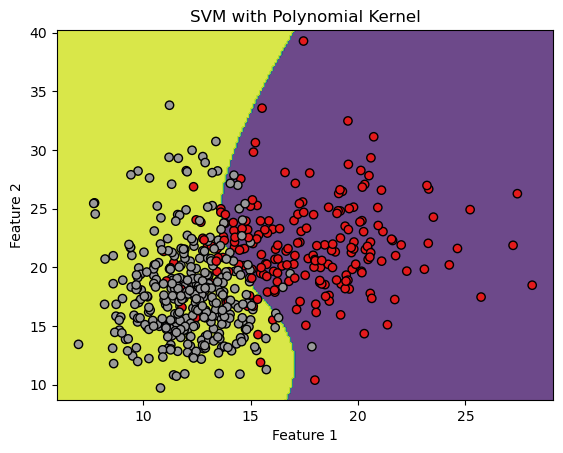

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Select only the first two features
y = data.target

# Create a SVM classifier with a polynomial kernel
svm = SVC(kernel='poly', degree=3)
svm.fit(X, y)

# Create a meshgrid of points to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel')
plt.show()

Radial Basis Function (RBF) kernels are widely used in machine learning, particularly in Support Vector Machines (SVMs), for solving classification and regression problems. RBF kernels are powerful in capturing complex and non-linear relationships within the data.

RBF kernels measure the similarity between data points in a high-dimensional feature space. They are based on the radial basis function, also known as the Gaussian function. The RBF kernel computes the similarity between two data points x and y using the formula:

`K(x, y) = exp(-gamma * ||x - y||^2)`

Here, ||x - y|| represents the Euclidean distance between x and y, and gamma is a parameter that determines the width of the RBF kernel. Gamma controls the influence of each training example on the decision boundary. Smaller values of gamma result in a wider spread of the kernel, while larger values make the kernel more localized.

RBF kernels are effective in handling non-linear relationships and can model complex decision boundaries. They have the ability to capture intricate patterns in the data, allowing SVMs to classify data points that are not linearly separable. However, selecting an appropriate value for gamma is crucial. A small gamma may lead to underfitting, while a large gamma may cause overfitting.

In summary, RBF kernels are a popular choice in SVMs for their ability to capture non-linear relationships and construct complex decision boundaries. By utilizing the Gaussian radial basis function, RBF kernels allow SVMs to effectively handle datasets with intricate patterns and provide accurate classification or regression results.

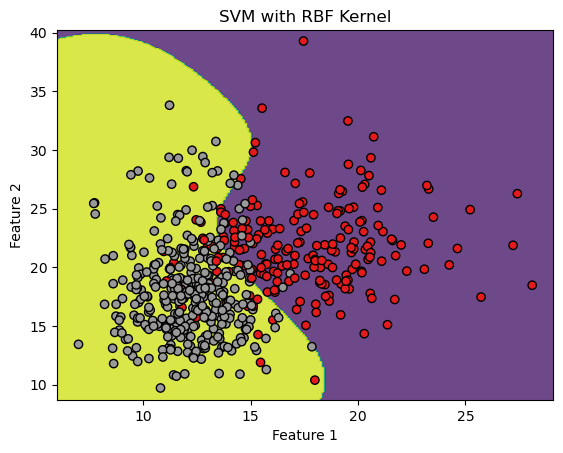

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Select only the first two features
y = data.target

# Create a SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X, y)

# Create a meshgrid of points to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel')
plt.show()


SVM (Support Vector Machine) can be used not only for classification but also for regression tasks. In SVM regression, the goal is to find a function that best fits the data while minimizing the prediction errors.

The basic idea of SVM regression is to find a hyperplane that maximizes the margin around the training data points. However, unlike SVM classification, where the goal is to separate different classes, in SVM regression, the hyperplane is used to estimate the continuous target variable.

Here are the key steps involved in SVM regression:

1) Data Preparation: Similar to other regression tasks, you need to prepare your dataset by splitting it into features (input variables) and the target variable (output variable) you want to predict.

2) Model Training: In SVM regression, you aim to find the best-fitting hyperplane by minimizing the prediction errors. The hyperplane is determined by support vectors, which are data points closest to the hyperplane. The algorithm tries to fit the hyperplane in a way that maximizes the margin (distance) between the hyperplane and the support vectors.

3) Hyperparameter Selection: SVM regression involves tuning hyperparameters like the regularization parameter (C) and the kernel function. The regularization parameter controls the trade-off between minimizing the error and maximizing the margin. The kernel function specifies the transformation of the input features into a higher-dimensional space.

4) Model Evaluation: Once the SVM regression model is trained, you can evaluate its performance using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared (coefficient of determination).

5) Prediction: Finally, you can use the trained SVM regression model to make predictions on new, unseen data by feeding the feature values into the model.

SVM regression is particularly useful when dealing with non-linear relationships between input variables and the target variable. By utilizing different types of kernel functions, such as the radial basis function (RBF) kernel, SVM regression can capture complex patterns and achieve better flexibility in modeling non-linear relationships.

It's worth noting that SVM regression can be sensitive to outliers, and appropriate preprocessing and outlier handling techniques may be necessary to improve the model's robustness.

Overall, SVM regression offers an effective approach for solving regression problems, especially when dealing with non-linear relationships and limited training data.

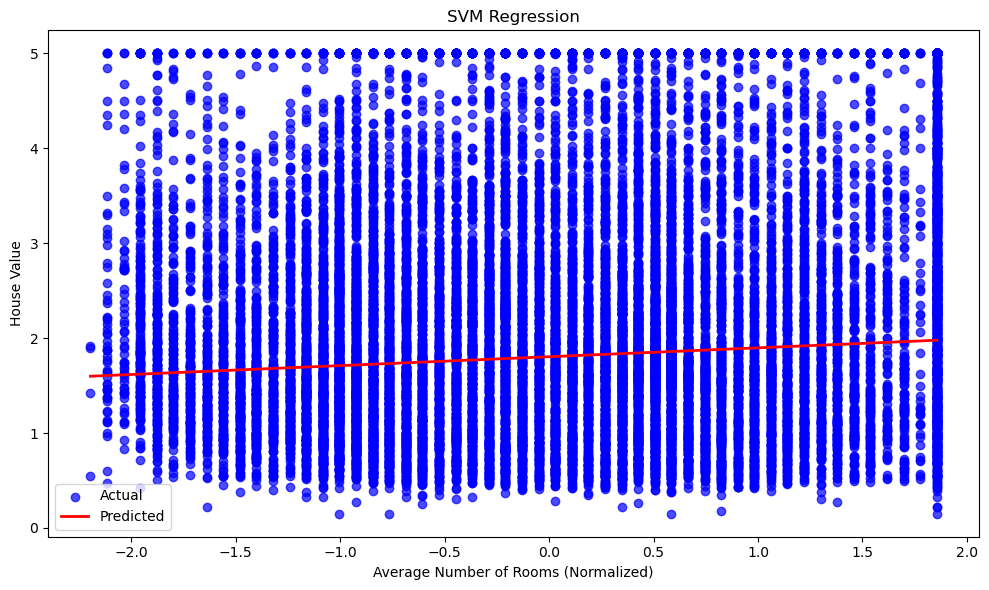

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, 1:2]  # Selecting the 2nd feature: average number of rooms
y = california_housing.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create and fit the SVM regression model
svr = SVR(kernel='linear')
svr.fit(X, y)

# Generate values for prediction
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict on the generated values
y_pred = svr.predict(X_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual', alpha=0.7)
plt.plot(X_pred, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Average Number of Rooms (Normalized)')
plt.ylabel('House Value')
plt.title('SVM Regression')
plt.legend()
plt.tight_layout()
plt.show()


In this example, we're using the `SVR` class from scikit-learn to perform SVM regression with a linear kernel. We're using the average number of rooms (`X`) as the feature and the house value (`y`) as the target variable from the California Housing dataset.

After fitting the SVM regression model, we make predictions on the training data (`X`) and plot the actual house values as scatter points and the predicted values as a line. This visualization helps us see how well the SVM regression model fits the data.

Note: As with any regression analysis, it's important to evaluate the model's performance on unseen data using techniques like cross-validation or train-test splits. This example is simplified for demonstration purposes.

The key differences between a normal SVM (Support Vector Machine) and SVM regression:

1) Task Type:

     - SVM Classification: In SVM classification, the goal is to separate different classes by finding an optimal hyperplane that maximizes the margin between the classes.
    - SVM Regression: In SVM regression, the goal is to estimate a continuous target variable by finding a hyperplane that best fits the data while minimizing the prediction errors.

2) Output:

    - SVM Classification: The output of SVM classification is a class label assigned to each data point, indicating the predicted class.
    - SVM Regression: The output of SVM regression is a continuous numerical value that represents the prediction for the target variable.

3) Margin and Support Vectors:

     - SVM Classification: In SVM classification, the margin refers to the distance between the hyperplane and the support vectors, which are the data points closest to the hyperplane. The goal is to maximize the margin while correctly classifying the data points.
     - SVM Regression: In SVM regression, the margin represents a region around the hyperplane where a certain percentage of the training data points lie. The support vectors in SVM regression are the data points that contribute to defining the hyperplane and the margin.

4) Loss Function:

     - SVM Classification: In SVM classification, the hinge loss function is used, which penalizes misclassification of data points. The goal is to minimize the hinge loss while maximizing the margin.
     - SVM Regression: In SVM regression, a loss function is used to measure the difference between the predicted values and the actual target values. The goal is to minimize this loss function while finding a hyperplane that fits the data.

5) Kernel Functions:

     - SVM Classification: Kernel functions in SVM classification, such as linear, polynomial, or radial basis function (RBF), are used to map the input features to a higher-dimensional space, allowing for non-linear decision boundaries.
     - SVM Regression: Similar to SVM classification, kernel functions in SVM regression can be used to map the input features to a higher-dimensional space, enabling the modeling of complex relationships between the features and the target variable.

6) Evaluation Metrics:

    - SVM Classification: Common evaluation metrics for SVM classification include accuracy, precision, recall, F1-score, and area under the ROC curve (AUC).
    - SVM Regression: Common evaluation metrics for SVM regression include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (coefficient of determination).

In summary, the main difference between a normal SVM and SVM regression lies in the task type and the nature of the output. SVM classification focuses on separating classes, while SVM regression aims to estimate a continuous target variable. The loss functions, margin, support vectors, and evaluation metrics also differ between the two.